In [4]:
import json
import re
import numpy as np

In [5]:
def generate_pairwise(start_index, num_cards, decks):
    """
    Generates pairwise counts of cards appearing in decks together
    inputs: start_index is used to generate indexes for cards, assumes card ID's ascend incrementally
    
    """
    array = np.zeros((num_cards, num_cards))
    count_array = np.zeros(num_cards) #occurence of each card
    for deck in decks:
        ids = list(deck.keys())
        for i in range(len(ids)):
            id1 = int(ids[i])-start_index
            count_array[id1] += deck[ids[i]]
            for j in range(i+1, len(ids)):
                id2 = int(ids[j])-start_index
                # use ratios t
#                 array[id1,id2] += deck[ids[j]]/deck[ids[i]]
#                 array[id2,id1] += deck[ids[i]]/deck[ids[j]]
                array[id1,id2] += 1
                array[id2,id1] += 1
                
    print('done')
    return array, count_array
                
            

In [6]:
card_dict = {} # map card ID to card name (may be unnecessary)
card_map = [] # index to card ID for nparray 
start_index = 0 # ID of first card - follows convention of TOP8Draft values
with open('M19_M19_M19_cards.txt') as f:
    for line in f:
        split = line.split(';')
        
        card_id = int(split[1].rstrip())
        card_name = split[0]
        
        card_dict[card_id] = card_name
        card_map.append(card_id)
        
    start_index = card_map[0]
# print(card_dict)
        
with open('consolidated_decks.json') as g:
    j = json.load(g)
    decks = j['decks']
    synergies, counts = generate_pairwise(start_index, len(card_map), decks)
    print(synergies)


done
[[   0. 1687.  470. ...  861.  849.  858.]
 [1687.    0.  506. ...  899.  884.  880.]
 [ 470.  506.    0. ...  240.  245.  224.]
 ...
 [ 861.  899.  240. ...    0.  475.  489.]
 [ 849.  884.  245. ...  475.    0.  458.]
 [ 858.  880.  224. ...  489.  458.    0.]]


In [7]:
print(counts)

[13214. 13359.  3526.  6002. 14085. 13413. 35952. 35242.  6748. 35766.
 35913. 35501. 13882. 15290. 35964. 35961.  5418. 35824. 35314. 13377.
  6617. 13670.  6631. 35595. 37773. 13349.  6325. 35544. 13498. 13454.
 35683. 35627.  5865.  3570. 35344. 35773. 13281. 35108.  5440. 35894.
 35823.  6405. 13358. 35525. 35880. 35538. 13342. 35803. 13620. 35698.
 35422.  6649. 35173. 35733. 13868. 35732. 35171. 35284. 14158.  5686.
 13366.  5431.  6307. 35612.  2678.  5507.  6222. 13386.  6039. 35332.
 35507. 13186. 13393. 13380. 35398.  5725. 13279. 13560.  3378. 34972.
 35583. 35606. 35379.  6571. 36171. 13419. 35760.  3277. 35604.  6092.
  6820. 13478. 35459. 35300. 35753. 13611.  5333. 13781.  6509. 35683.
 35793.  5571. 35610.  6724. 38701.  2760.  5755. 35414. 35879. 15493.
 13433.  5928.  5494. 13516. 13562. 13426. 13272. 35701. 35347. 35363.
 13133. 36387. 36027. 35707. 13826. 35494. 35430.  5297.  2702.  6945.
 35517. 35535. 35322.  5885.  6897.  6421. 13296. 13560. 36626. 13687.
 35903

In [8]:
a = synergies.T/counts
a *= 1000
a = a.round()

In [9]:
# synergies = synergies.round()

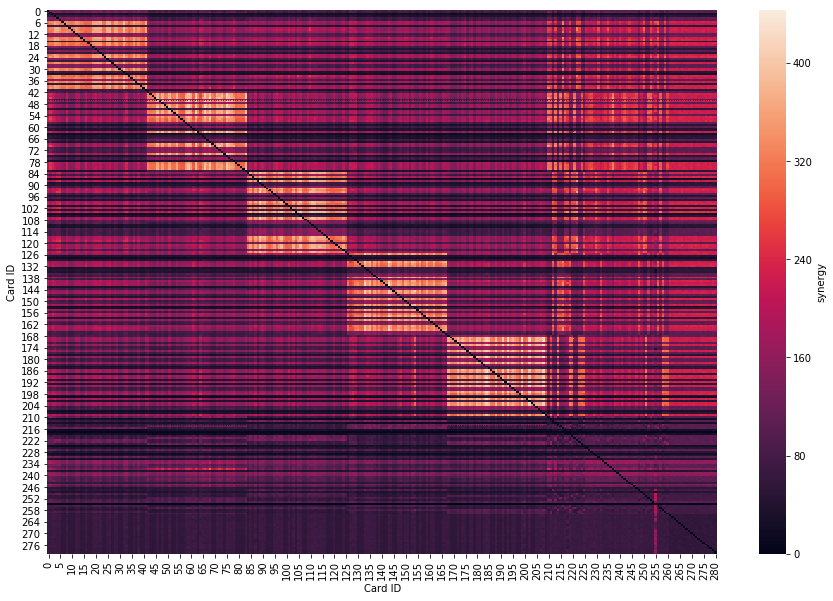

In [10]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(a, ax=ax, cbar_kws={'label': 'synergy'})
plt.xlabel('Card ID')
plt.ylabel('Card ID')
plt.show()

In [12]:
max(a.max(axis=1))

443.0

In [13]:
itemindex = np.where(a == 443)
itemindex

(array([45]), array([68]))

https://img.scryfall.com/cards/small/front/e/1/e19723ad-7bd2-49ee-a57a-ece99018f4e8.jpg?1538881020
Glaive of the Guildpact


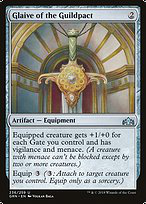

In [1]:
import requests
from PIL import Image
import requests
from io import BytesIO

def getCard(id):
    """
    Returns card JSON based on ID from Scryfall API
    """
    r = requests.get('https://api.scryfall.com/cards/multiverse/' + str(id))
    data = r.json()
    try:
        name = data['name']
    except KeyError:
        name = ''
    try:
        url = data['image_uris']['small']
    except KeyError:
        url = ''
    return name, url

def getImage(url):
    """
    Returns "normal" image JPEG from Scryfall Image Library
    """
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

name, image_url = getCard(452986)
print(image_url)
print(name)
getImage(image_url)

In [209]:
#404 [104, 123]
print(card_dict[card_map[104]] + " ; " + card_dict[card_map[123]])

#398 [176, 173]
print(card_dict[card_map[176]] + " ; " + card_dict[card_map[173]])

#394 [24, 7]
print(card_dict[card_map[24]] + " ; " + card_dict[card_map[7]])

#398 [104, 122]
print(card_dict[card_map[104]] + " ; " + card_dict[card_map[122]])

#391 [204, 171]
print(card_dict[card_map[204]] + " ; " + card_dict[card_map[171]])

Lich's Caress ; Vampire Neonate
Druid of the Cowl ; Daggerback Basilisk
Luminous Bonds ; Cavalry Drillmaster
Lich's Caress ; Two-Headed Zombie
Titanic Growth ; Colossal Dreadmaw


In [198]:
print(start_index)

447137


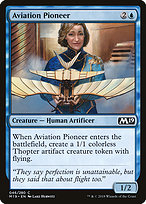

In [2]:
name, image_url = getCard(45 + 447137)
getImage(image_url)


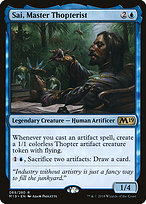

In [3]:
name, image_url = getCard(68 + 447137)
getImage(image_url)

In [ ]:
# #14259 [176, 173]
# print(card_dict[card_map[176]] + " ; " + card_dict[card_map[173]])

# #14174 [171, 169]
# print(card_dict[card_map[171]] + " ; " + card_dict[card_map[169]])

# #14106 [170, 171]
# print(card_dict[card_map[170]] + " ; " + card_dict[card_map[171]])

# #14124 [173, 176]
# print(card_dict[card_map[173]] + " ; " + card_dict[card_map[176]])

# #14124 [173, 176]
# print(card_dict[card_map[173]] + " ; " + card_dict[card_map[176]])